In [1]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

将数据输入神经网络之前，应该将数据格式化为经过预处理的浮点数张量
现在，数据以 JPEG 文件的形式保存在硬盘中

所以数据预处理步骤大致如下
(1) 读取图像文件。
(2) 将 JPEG 文件解码为 RGB 像素网格。
(3) 将这些像素网格转换为浮点数张量。
(4) 将像素值（0~255 范围内）缩放到 [0, 1] 区间（正如你所知，神经网络喜欢处理较小的输
入值）

幸运的是，Keras 拥有自动完成这些步骤的工具。Keras
有一个图像处理辅助工具的模块，位于 keras.preprocessing.image。特别地，它包含
ImageDataGenerator 类，可以快速创建 Python 生成器，能够将硬盘上的图像文件自动转换
为预处理好的张量批量

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_dir = 'D:\\TrainData\\dog_cat_small\\train'
validation_dir = 'D:\\TrainData\\dog_cat_small\\validation'
test_dir = 'D:\\TrainData\\dog_cat_small\\test'

# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale=1./255) 
validation_datagen = ImageDataGenerator(rescale=1./255)

# 将所有图像的大小调整为 150×150 
# 因为使用了 binary_crossentropy 所以需要用二进制标签
# 它生成了 150×150 的 RGB 图像［形状为 (20, 150, 150, 3)］与二进制标签［形状为 (20,)］组成的批量。每个批量中包含 20 个样本（批量大小）。
# 注意，生成器会不停地生成这些批量，它会不断循环目标文件夹中的图像。因此，你需要在某个时刻终止（break）迭代循环
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20,class_mode='binary')

# 使用 fit_generator 方法来拟合，它在数据生成器上的效果和 fit 相同。它的第一个参数应该是一个 Python 生成器，可以不停地生成输入和目标组成的批量
# steps_per_epoch 参数的作用：从生成器中抽取 steps_per_epoch 个批量后（即运行了 steps_per_epoch 次梯度下降），拟合过程将进入下一个轮次
# 每个批量包含 20 个样本，所以读取完所有 2000 个样本需要 100个批量
#
history = model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


d:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
100/100 [==============================] - 15s 106ms/step - loss: 0.6927 - acc: 0.5150 - val_loss: 0.6740 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 4s 41ms/step - loss: 0.6634 - acc: 0.6040 - val_loss: 0.6642 - val_acc: 0.5820
Epoch 3/30
100/100 [==============================] - 4s 40ms/step - loss: 0.6318 - acc: 0.6430 - val_loss: 0.6567 - val_acc: 0.6080
Epoch 4/30
100/100 [==============================] - 4s 40ms/step - loss: 0.5953 - acc: 0.6740 - val_loss: 0.6138 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5570 - acc: 0.7110 - val_loss: 0.7057 - val_acc: 0.5760
Epoch 6/30
100/100 [==============================] - 4s 41ms/step - loss: 0.5236 - acc: 0.7285 - val_loss: 0.6049 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 4s 40ms/step - loss: 0.4810 - acc: 0.7695 - val_loss: 0.6706 - val_acc: 0.6260
Epoch 8/30
100/100 [==============================] - 4s 40ms/step 

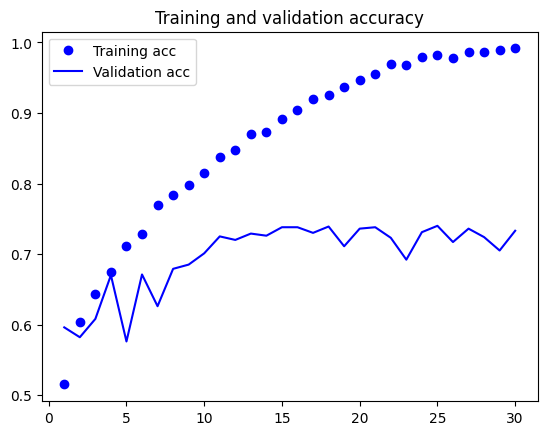

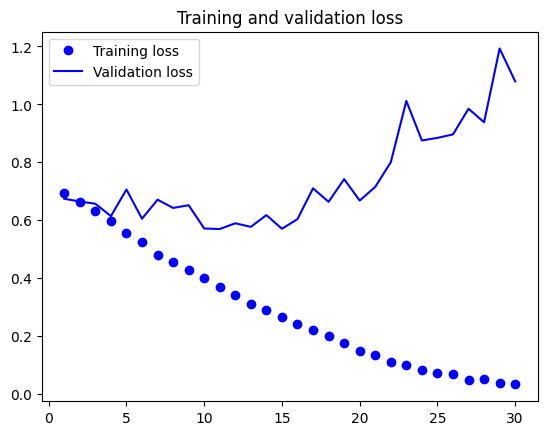

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

从这些图像中都能看出过拟合的特征。训练精度随着时间线性增加，直到接近 100%，而验证精度则停留在 70%~72%。验证损失仅在 5 轮后就达到最小值，然后保持不变，
而训练损失则一直线性下降，直到接近于 0